In [4]:
import rasterio
from shapely.geometry import mapping, box
import rasterio.mask
from rasterio.mask import mask
import rasterio.features
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import generic_filter

In [5]:
# dark mode for matplotlib
plt.style.use('dark_background')

Protected area and OECM spatial data are collected in the form of boundaries (polygon) wherever they are available,
or as a single latitude and longitude coordinate (point) where boundary data are not available. 

The central point of each protected area is usually requested but this is not always possible, 
so users should not assume that all points in the WDPA or OECM database represent the

In [8]:
# looading and concat polygons and points

poly1 = gpd.read_file('data/biodiversity/WDPA_shp_0/WDPA_shp-polygons.shp') 
poly2 = gpd.read_file('data/biodiversity/WDPA_shp_1/WDPA_shp-polygons.shp')
poly3 = gpd.read_file('data/biodiversity/WDPA_shp_2/WDPA_shp-polygons.shp')

polygons = gpd.GeoDataFrame(pd.concat([poly1, poly2, poly3], ignore_index=True))


point1 = gpd.read_file('data/biodiversity/WDPA_shp_0/WDPA_shp-points.shp') 
point2 = gpd.read_file('data/biodiversity/WDPA_shp_1/WDPA_shp-points.shp')
point3 = gpd.read_file('data/biodiversity/WDPA_shp_0/WDPA_shp-points.shp')


points = gpd.GeoDataFrame(pd.concat([point1, point2, point3], ignore_index=True))
brazil = gpd.read_file('data/brazil.geojson')


In [18]:
# Check CRS
print(polygons.crs)
print(points.crs)
print(brazil.crs)

epsg:4326
epsg:4326
epsg:4326
Polygon GCS:  4326
Point GCS:  4326


In [12]:

  
print(polygons.head())
print(points.head())


   WDPAID WDPA_PID PA_DEF                                NAME  \
0    42.0       42      1  Reserva Biológica Do Lago Piratuba   
1    43.0       43      1  Reserva Biológica Do Rio Trombetas   
2    44.0       44      1           Reserva Biológica Do Jaru   
3    46.0       46      1    Reserva Biológica Atol Das Rocas   
4    47.0       47      1      Reserva Biológica De Sooretama   

                            ORIG_NAME              DESIG           DESIG_ENG  \
0  Reserva Biológica Do Lago Piratuba  Reserva Biológica  Biological Reserve   
1  Reserva Biológica Do Rio Trombetas  Reserva Biológica  Biological Reserve   
2           Reserva Biológica Do Jaru  Reserva Biológica  Biological Reserve   
3    Reserva Biológica Atol Das Rocas  Reserva Biológica  Biological Reserve   
4      Reserva Biológica De Sooretama  Reserva Biológica  Biological Reserve   

  DESIG_TYPE IUCN_CAT        INT_CRIT  ...  \
0   National       Ia  Not Applicable  ...   
1   National       Ia  Not Applicabl

In [9]:
# Perform the clipping operation
polygons_clipped = gpd.clip(polygons, brazil)
points_clipped = gpd.clip(points, brazil)

#The gpd.clip() function takes two GeoDataFrames as input and returns a new GeoDataFrame that consists of geometries 
#from the first GeoDataFrame that are located within the boundaries of the second GeoDataFrame.

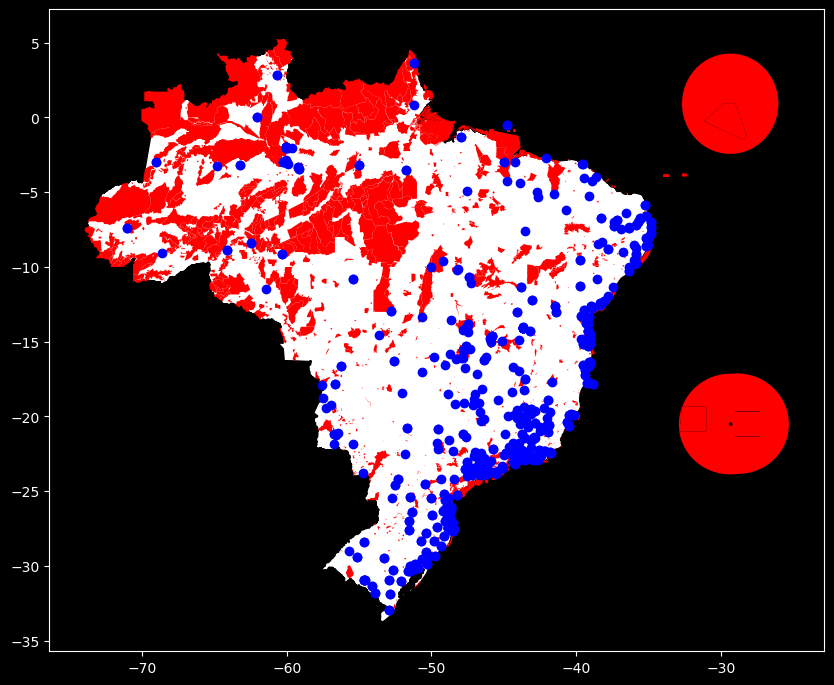

In [11]:
# Plot Brazil
fig, ax = plt.subplots(figsize=(10,10))
brazil.plot(ax=ax, color='white', edgecolor='black')

# Plot polygons and points on top
polygons.plot(ax=ax, color='red')
points.plot(ax=ax, color='blue')

plt.show()

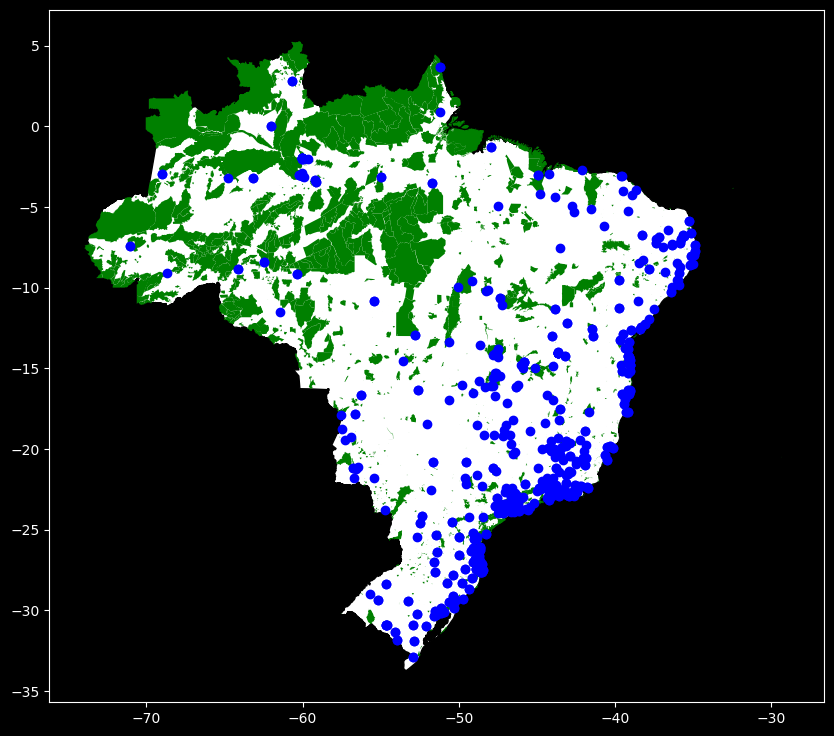

In [17]:
# Masked on Brazil's map

fig, ax = plt.subplots(figsize=(10,10))
brazil.plot(ax=ax, color='white', edgecolor='black')

# Plot clipped polygons and points on top
polygons_clipped.plot(ax=ax, color='green')
points_clipped.plot(ax=ax, color='blue')

plt.show()
